In [1]:
%matplotlib inline

# Databehandling og analyse av slepeforsøk


<img src="slepegraf.png" alt="Drawing" style="width: 500px;"/>


## Læringsutbytte
- Importere og åpne slepeforsøksresultater i dataverktøy  
- Analysere målingene og finne gjennomsnittsverdier 
- Plotte datastrømmen og visuelt vurdere hvor verdiene er representable. 


## Introduksjon
Slepekraften som må til for å sette skroget i bevegelse (akselerasjon), og holde det i konstant hastighet blir logget av en lastcelle montert på slepevognen. Sensitiviteten til lastcellen er relativt høy (for å få nøyaktige resulat), men det fører også med endel støy. Lastcellen måler kraften mange ganger per sekund. *Samplingsraten* er ofte oppgitt i Hertz. Resultatet blir skrevet til en fil sammen med andre opplysninger som tidspunkt, hastighet, posisjon osv.  

Vi bruker pythonmodulen *pandas* for prosessering av dataene.  
https://realpython.com/pandas-read-write-files/#write-a-csv-file

In [2]:
import pandas as pd

Resultatet fra slepeforsøket er skrevet til en fil av typen .csv som er forkortelsen for [*comma-separated values*](https://snl.no/CSV). Hver linje i filen består at en måleregistrering. Filen tolkes av *pandas* direkte og trenger derfor ingen videre formattering. 


In [3]:
# laster inn csv filen med slepedataene. Det er her viktig at filen ligger i samme mappe som .ipynb filen. 
df_slepelog = pd.read_csv('slepelog.csv', sep=";" , decimal=",")

*df* er en forkortelse for pandas datatype *dataframe*. Den har et par nyttige *methods* som f.eks 
dataframe.head() -viser de 5 første linje 

In [4]:
df_slepelog.head()

Time  NI 9237 Slot4 CH0 Force  Wagon Position  Wagon Velocity
0  11:14 08,603                 0.009789             1.0             0.0
1  11:14 08,613                 0.000667             1.0             0.0
2  11:14 08,622                 0.004338             1.0             0.0
3  11:14 08,635                -0.001079             1.0             0.0
4  11:14 08,642                 0.000751             1.0             0.0

På øverste rad ser man *header* med 4 forskjellige loggede data. I første kolonnen er loggetidspunktet, i andre er kraftsensorverdi, tredje vognposisjon og sist vognhastighet. Her er vognhastighet = skroghastighet. Vi etablerer *variabler* for headerne (som gjør det enklere å referere til de når de skal plottes)

In [5]:
kraft = 'NI 9237 Slot4 CH0 Force'
hastighet = 'Wagon Velocity'

## Hastighetsplot 
Vi er i første omgang ute etter å finne de måledataene som er representable for å lese ut slepemotstanden. 
Den slepemotstanden vi forsøker å etablere er når skroget har konstant hastighet gjennom vannet. Derfor analyser vi derfor først et plot av vognhastighet. 

<AxesSubplot: >

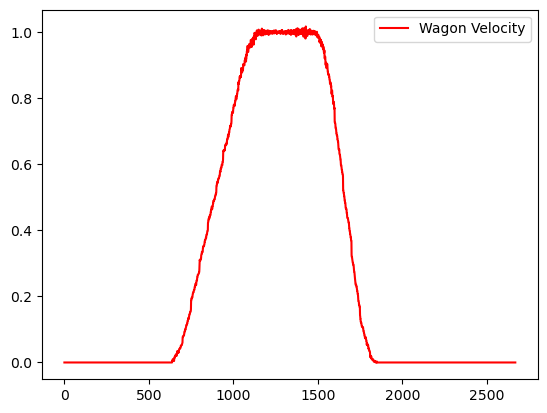

In [6]:
df_slepelog.plot(kind='line',y=hastighet, color= 'red', use_index=True)

De første ca. 700 måleavlesningene så er hastigheten null og vognen står stille. Så begynner den og bevege seg og hastigheten stiger gradvis til den når ca 1.0m/s omtrentlig ved måleavlesning nummer 1200. Vognen har så tilnærmet konstant hastighet til måling nummer 1500. Etter det reduseres hastighet og vognen står igjen stille ved enden slepetanken. Måleavlesning viser da ca. 1800. 

## Hastighet vs slepemotstand  
Vi ser videre på slepemostandsforløpet i relasjon til hastigheten.   

<AxesSubplot: >

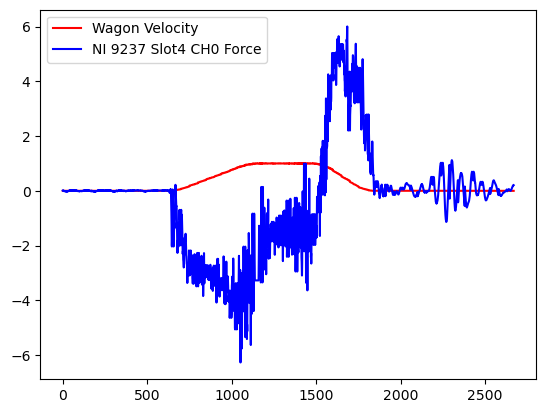

In [7]:
df_slepelog.plot(kind='line',y=[hastighet,  kraft ], color= ['red', 'blue'], use_index=True)

Slepemotstandsverdiene kan her grovt sett deles i 5 faser: 
1. Før start. Her er kraften bortimot null, men noe støy kan sees. 
2. Akselerasjonsfasen av vognen. Her øker kraften relativt linært i forhold til hastighetsøkningen og når en topp når vognen når ønsket hastighet
3. Konstant hastighetsområdet. Vognen holder nå jevn hastighet og motstanden er betraktelig mindre enn ved oppstart. 
4. Retardasjonsfasen. Vognen er nå kommet mot slutten av bassenget og bremser da opp. Slepemotstanden skifter da fortegn (momentumet som skroget har) inkludert effekten av *added mass* må da også bremses opp. Kraften er her større enn ved oppstart og det kan forklares med at helningen på kurven ved akselerasjon er betraktelig slakkere enn ved oppbremsningen. Dvs oppbremsingen er bråere. 
5. Etter stopp. Bølger som tidligere er generert i bassenget gir utslag på sensor en god stund etter.  

## Glidende gjennomsnitt
Et ofte brukte hjelpemiddel for å finne gjennomsnitt i en større datastrøm  og der dataene varierer mye er å bruke noe som kalles for *glidende gjennomsnitt* På engelsk "simple moving average". 

In [10]:
# the simple moving average over a period of 10 years
df_slepelog['SMA_10'] = df_slepelog[kraft].rolling(10, min_periods=1).mean()
df_slepelog['SMA_30'] = df_slepelog[kraft].rolling(30, min_periods=1).mean()
df_slepelog['SMA_45'] = df_slepelog[kraft].rolling(45, min_periods=1).mean()

<AxesSubplot: >

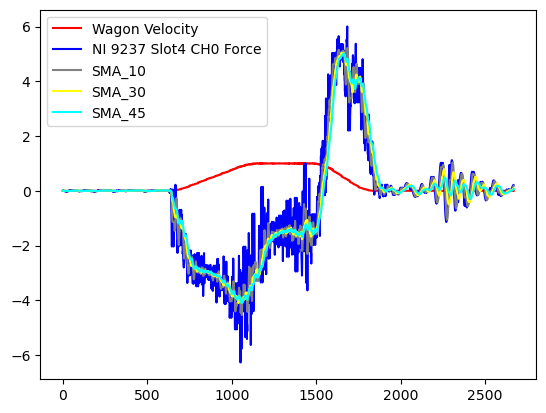

In [11]:

df_slepelog.plot(kind='line' , y=[hastighet,  kraft , 'SMA_10' , 'SMA_30', 'SMA_45' ], color= ['red', 'blue', 'grey' , 'yellow', 'cyan'], use_index=True)

Det er gjennomnsittet av slepemotstanden under konstant hastighet som er målet. Ved å se på hastighetsprofilen så ser man at skroget har tilnærmet konstant hastighet på 1m/s i mellom målepunktene 1000-1500. Ved inspeksjon av plot der vi kun ser på dataene mellom 1000 og 1600 ser vi at dette kan snevres inn til 1200-1400. 

<AxesSubplot: >

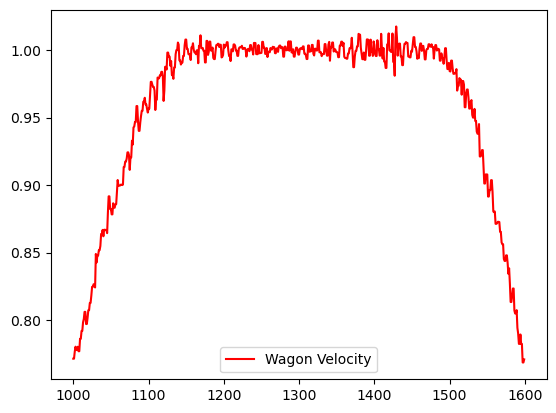

In [13]:
df_slepelog[1000:1600].plot(kind='line',y=hastighet, color= 'red', use_index=True)

<AxesSubplot: >

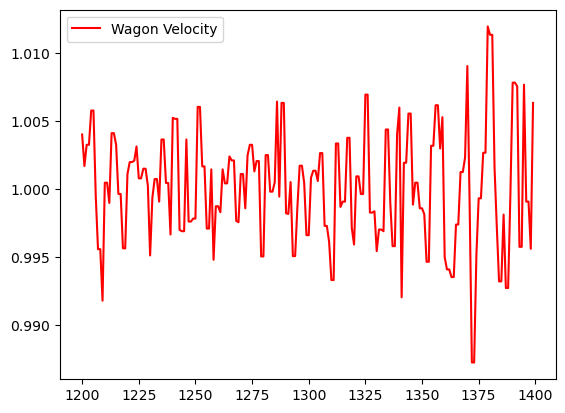

In [14]:
df_slepelog[1200:1400].plot(kind='line',y=hastighet, color= 'red', use_index=True)

<AxesSubplot: >

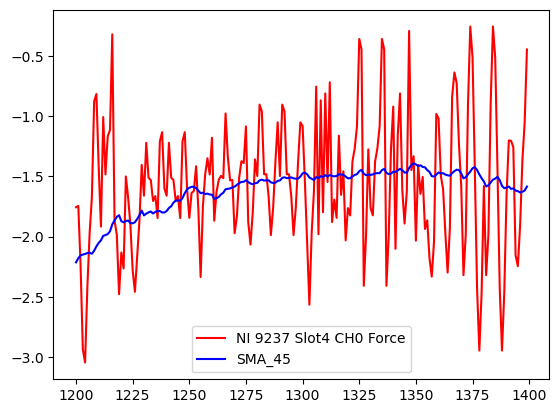

In [15]:
df_slepelog[1200:1400].plot(kind='line',y=[ kraft , 'SMA_45' ], color= ['red', 'blue'], use_index=True)

In [16]:
slepekraft_gjennomsnitt = df_slepelog['SMA_45'][1225:1450].mean()
print(slepekraft_gjennomsnitt) 

-1.5364010590617283


Resultatet gjøres så presentabelt ved å anvende to av pythons nyttige formatteringverktøy *f-string* og *format*  

In [17]:
print(f'Gjennomsnittelig slepekraft er {"%0.4f" % (slepekraft_gjennomsnitt)}N ')

Gjennomsnittelig slepekraft er -1.5364N 
